# Ключът към щастието

Като започваш задачите си в последния момент и не знаеш дали изобщо ще ги довършиш в срок, надали си много щастлив, но поне може да видиш как се чувстват другите хора през това време и най-вероятно да осъзнаеш, че твоето положение си е направо розово в сравнение с гладните африканчета.

Ще разгледаме данните от [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)
![World Happiness Report Cover image](dataset-thumbnail.jpg)

## Пръв поглед

> ### Съдържание

> [**Пръв поглед**](#Пръв-поглед)

> [Обработка на данните](#Обработка-на-данните)

> [Визуализация](#Визуализация)

> [Трениране на модел](#Трениране-на-модел)

> [Заключение](#Заключение)

Нека първо заредим данните:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_15 = pd.read_csv('data/2015.csv')
data_16 = pd.read_csv('data/2016.csv')
data_17 = pd.read_csv('data/2017.csv')

Да им хвърлим бърз поглед:

In [3]:
data_15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
data_16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [5]:
data_17

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


Според данните мисля, че ще може да пробваме да предсказваме `happiness score` спрямо другите данни, но дали това ще бъде успешно, само времето ще покаже (ако стигне).

## Обработка на данните

> ### Съдържание

> [Пръв поглед](#Пръв-поглед)

> [**Обработка на данните**](#Обработка-на-данните)

> [Визуализация](#Визуализация)

> [Трениране на модел](#Трениране-на-модел)

> [Заключение](#Заключение)

Има лека разлика в предоставените данни по години, като в 2017 има и малка разлика в имената на колоните.
Нека ги уеднаквим:

Първо да преименуваме колоните за 2017:

In [6]:
def clean_column_name(column_name):
    new_col = column_name.lower().replace('..', ' ').replace('.', ' ').rstrip().replace('(', '').replace(')', '')
    return new_col

data_17.columns = map(clean_column_name, data_17.columns)

In [7]:
data_17.head(5)

,country,happiness rank,happiness score,whisker high,whisker low,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Нека приложим същата процедура и за данните от 2015 и 2016:

In [8]:
data_15.columns = map(clean_column_name, data_15.columns)
data_16.columns = map(clean_column_name, data_16.columns)

In [9]:
data_15.head(5)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
data_16.head(5)

,country,region,happiness rank,happiness score,lower confidence interval,upper confidence interval,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Забелязваме, че в данните за 2017 нямаме регион за държавите - вероятно ще можем да го попълним от данните от предните години. Освен това за 2015 имаме само `standard error`, а за 2016 и 2017 имаме `confidence interval` и `whisker`-и. Ако приемем, че става дума за 95% `confidence interval` и `whisker`-ите също показват точно този интервал, можем да намерим `standard error` за данните за 2016 и 2017 и да използваме само него, както в данните за 2015.

95% `confidence interval` в стандартно нормално разпределениe (след малък search в google и ако не ме лъжат спомените от курса по статистика и не се окаже, че всъщност говоря пълни глупости :D) е [-1.96, 1.96] и би трябвало да можем да намерим `standard error` по следния начин:

In [11]:
data_16_std_error = (data_16['upper confidence interval'] - data_16['happiness score']) / 1.96
data_16_std_error.head(10)

0    0.033673
1    0.041327
2    0.085714
3    0.039286
4    0.031633
5    0.035204
6    0.028061
7    0.035714
8    0.036735
9    0.032653
dtype: float64

Числата приличат на тези за `standard error` за 2015. Сигурно формулата ни е вярна. Да пробваме с данните за 2017:

In [12]:
data_17_std_error = (data_17['whisker high'] - data_17['happiness score']) / 1.96
data_17_std_error.head(10)

0    0.029308
1    0.030474
2    0.060220
3    0.034578
4    0.029868
5    0.025728
6    0.034899
7    0.033424
8    0.030661
9    0.037067
dtype: float64

Отново получаваме данни, подобни на тези от 2015. В такъв случай ще ползваме новите данни вместо интервалите за 2016 и 2017, за да работим с едни и същи данни за различните години.

In [13]:
data_16['standard error'] = data_16_std_error
data_16 = data_16.drop(['lower confidence interval', 'upper confidence interval'], axis=1)
data_16.head(3)

,country,region,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,standard error
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0.033673
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0.041327
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0.085714


In [14]:
data_17['standard error'] = data_17_std_error
data_17 = data_17.drop(['whisker low', 'whisker high'], axis=1)
data_17.head(3)

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.029308
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.030474
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.060220


Да видим отново и формата на данните от 2015:

In [15]:
data_15.head(3)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


Има разминаване в подредбата на колоните, което не знам все още дали ще ни пречи, а в данните за 2017 нямаме регион за държавите.

Да видим можем ли да попълним регионите за държавите от данните за 2017 от данните от предишни години:

In [16]:
data_17.shape

(155, 11)

In [17]:
merged_15_17 = pd.merge(data_17, data_15, on='country')
merged_15_17.shape

(149, 22)

In [18]:
merged_16_17 = pd.merge(data_17, data_16, on='country')
merged_16_17.shape

(150, 22)

Явно липсват някои държави. Нека видим какво се случва:

In [19]:
merged_15_17 = merged_15_17[['country', 'region']]
merged_16_17 = merged_16_17[['country', 'region']]
merged_16_17.head()

,country,region
0,Norway,Western Europe
1,Denmark,Western Europe
2,Iceland,Western Europe
3,Switzerland,Western Europe
4,Finland,Western Europe


In [20]:
data_17_region_16 = data_17.join(merged_16_17.set_index('country'), on='country')

Липсващите държави в данните за 2017 след `merge` с данните от 2016:

In [21]:
missing_regions = data_17_region_16.loc[data_17_region_16['region'].isnull(), 'country'].tolist()
missing_regions

['Taiwan Province of China',
 'Hong Kong S.A.R., China',
 'Mozambique',
 'Lesotho',
 'Central African Republic']

Нека пробваме да ги вземем от данните за 2015:

In [22]:
data_17_region_15 = data_17.join(merged_15_17.set_index('country'), on='country')

In [23]:
data_17_region_15[data_17_region_15['region'].isnull()]

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607,0.037039,NaN
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956,0.123083,NaN
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,0.039589,NaN
92,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,0.046675,NaN
110,Namibia,111,4.574,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147,1.481890,0.100181,NaN
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,0.068642,NaN


In [24]:
data_17_region_15[data_17_region_15['country'].isin(missing_regions)]

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607,0.037039,NaN
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,0.039589,NaN
112,Mozambique,113,4.550,0.234306,0.870701,0.106654,0.480791,0.322228,0.179436,2.355651,0.114338,Sub-Saharan Africa
138,Lesotho,139,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,0.120584,Sub-Saharan Africa
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0.087696,Sub-Saharan Africa


Ще попълним данните с copy/paste от `merge`-а 2015/2017:

In [25]:
data_17 = data_17_region_16
data_17.loc[data_17['country'].isin(['Mozambique', 'Lesotho', 'Central African Republic']), 'region'] = 'Sub-Saharan Africa'
data_17.loc[data_17['country'].isin(['Mozambique', 'Lesotho', 'Central African Republic']), ['country', 'region']]

,country,region
112,Mozambique,Sub-Saharan Africa
138,Lesotho,Sub-Saharan Africa
154,Central African Republic,Sub-Saharan Africa


In [26]:
data_17.head(3)

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.029308,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.030474,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.060220,Western Europe


In [27]:
data_17[data_17.region.isnull()]

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607,0.037039,NaN
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,0.039589,NaN


Нямаме данни за регион за Тайван и Хонг Конг, но тъй като са в непосредствена близост до Китай може да вземем същият регион като Китай.

In [28]:
data_17[data_17.country == 'China']

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
78,China,79,5.273,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939,0.023611,Eastern Asia


Все пак да проверим дали нямаме различни данни например за Япония, тъй като е остров като Тайван:

In [29]:
data_17[data_17.country == 'Japan']

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
50,Japan,51,5.92,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224,0.036081,Eastern Asia


Не, нищо специално - регионът си е просто Източна Азия. Попълваме го:

In [30]:
data_17.loc[data_17.region.isnull(), 'region'] = 'Eastern Asia'
data_17.loc[data_17.region == 'Eastern Asia', ['country', 'region']]

,country,region
32,Taiwan Province of China,Eastern Asia
50,Japan,Eastern Asia
54,South Korea,Eastern Asia
70,"Hong Kong S.A.R., China",Eastern Asia
78,China,Eastern Asia
99,Mongolia,Eastern Asia


Да видим докъде стигнахме с данните:

In [31]:
data_15.head(1)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [32]:
data_16.head(1)

,country,region,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,standard error
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0.033673


In [33]:
data_17.head(1)

,country,happiness rank,happiness score,economy gdp per capita,family,health life expectancy,freedom,generosity,trust government corruption,dystopia residual,standard error,region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.029308,Western Europe


Малко са разбъркани колоните, нека ги подредим навсякъде както са в `data_15`:

In [34]:
columns = data_15.columns.tolist()
columns

['country',
 'region',
 'happiness rank',
 'happiness score',
 'standard error',
 'economy gdp per capita',
 'family',
 'health life expectancy',
 'freedom',
 'trust government corruption',
 'generosity',
 'dystopia residual']

In [35]:
data_16 = data_16[columns]
data_16.head(1)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual
0,Denmark,Western Europe,1,7.526,0.033673,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [36]:
data_17 = data_17[columns]
data_17.head(1)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual
0,Norway,Western Europe,1,7.537,0.029308,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027


Сега нека добавим годината като колона в `DataFrame`-овете и нека след това ги съберем в един.

In [37]:
data_15['year'] = 2015
data_15.head(1)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015


In [38]:
data_16['year'] = 2016
data_16.head(1)

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,year
0,Denmark,Western Europe,1,7.526,0.033673,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016


In [39]:
data_17['year'] = 2017
data_17.head(1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,year
0,Norway,Western Europe,1,7.537,0.029308,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017


Всичко изглежда наред. Последни проверки преди сливането:

In [40]:
data_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
country                        158 non-null object
region                         158 non-null object
happiness rank                 158 non-null int64
happiness score                158 non-null float64
standard error                 158 non-null float64
economy gdp per capita         158 non-null float64
family                         158 non-null float64
health life expectancy         158 non-null float64
freedom                        158 non-null float64
trust government corruption    158 non-null float64
generosity                     158 non-null float64
dystopia residual              158 non-null float64
year                           158 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 16.1+ KB


In [41]:
data_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
country                        157 non-null object
region                         157 non-null object
happiness rank                 157 non-null int64
happiness score                157 non-null float64
standard error                 157 non-null float64
economy gdp per capita         157 non-null float64
family                         157 non-null float64
health life expectancy         157 non-null float64
freedom                        157 non-null float64
trust government corruption    157 non-null float64
generosity                     157 non-null float64
dystopia residual              157 non-null float64
year                           157 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 16.0+ KB


In [42]:
data_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
country                        155 non-null object
region                         155 non-null object
happiness rank                 155 non-null int64
happiness score                155 non-null float64
standard error                 155 non-null float64
economy gdp per capita         155 non-null float64
family                         155 non-null float64
health life expectancy         155 non-null float64
freedom                        155 non-null float64
trust government corruption    155 non-null float64
generosity                     155 non-null float64
dystopia residual              155 non-null float64
year                           155 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 15.8+ KB


Изглежда, че нямаме липси в данните и колоните са еднакви. Нека съберем данните на едно място:

In [43]:
data = pd.concat([data_15, data_16, data_17], ignore_index=True)
data

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,year
0,Switzerland,Western Europe,1,7.587,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.561,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.527,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.522,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.427,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
5,Finland,Western Europe,6,7.406,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550,2015
6,Netherlands,Western Europe,7,7.378,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700,2015
7,Sweden,Western Europe,8,7.364,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190,2015
8,New Zealand,Australia and New Zealand,9,7.286,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,2015
9,Australia,Australia and New Zealand,10,7.284,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,2015


## Визуализация

> ### Съдържание

> [Пръв поглед](#Пръв-поглед)

> [Обработка на данните](#Обработка-на-данните)

> [**Визуализация**](#Визуализация)

> [Трениране на модел](#Трениране-на-модел)

> [Заключение](#Заключение)

След като обработихме данните, за да постигнем консистентност между данните от различни години, нека разгледаме какво всъщност показват тези данни.

Да си направим функция, с която ще разгледаме какво е отношението между някои колони/feature-и и `happiness score`:

In [44]:
def plot_vs_happiness(second_feature):
    second_feature_clean_name = clean_column_name(second_feature)
    sns.kdeplot(data=data['happiness score'], data2=data[second_feature_clean_name], shade=True)
    plt.scatter(x=data['happiness score'], y=data[second_feature_clean_name], alpha=0.2, color='green')
    plt.xlabel('Happiness Score')
    plt.ylabel(second_feature)
    plt.title('Happiness vs. ' + second_feature)
    plt.show()

In [45]:
data.columns.tolist()

['country',
 'region',
 'happiness rank',
 'happiness score',
 'standard error',
 'economy gdp per capita',
 'family',
 'health life expectancy',
 'freedom',
 'trust government corruption',
 'generosity',
 'dystopia residual',
 'year']

Сега да разгледаме отношението спрямо брутния вътрешен продукт на глава от населението:

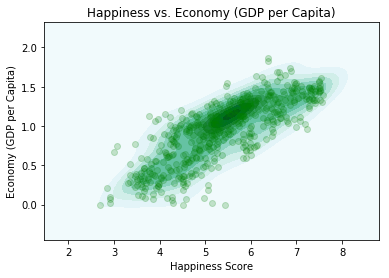

In [46]:
plot_vs_happiness('Economy (GDP per Capita)')

Спрямо семейството (вероятно нормиран резултат от разведени родители/членове на семейството/т.н.):

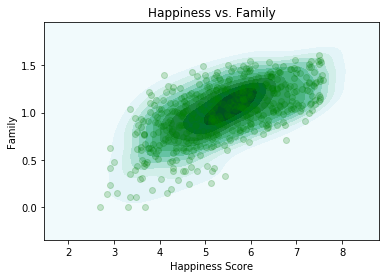

In [47]:
plot_vs_happiness('Family')

Свобода и свободия:

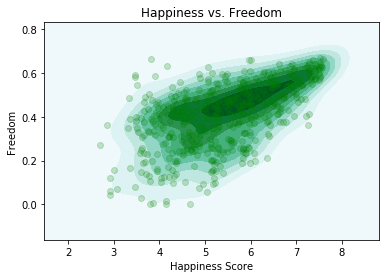

In [48]:
plot_vs_happiness('Freedom')

Щедрост:

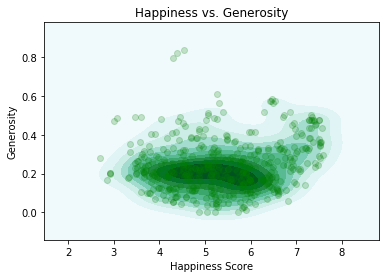

In [49]:
plot_vs_happiness('Generosity')

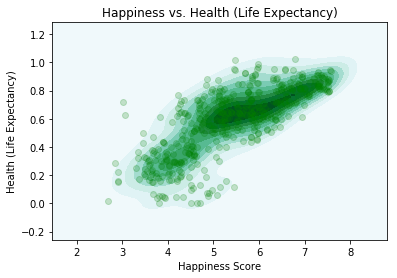

In [50]:
plot_vs_happiness('Health (Life Expectancy)')

Вяра в управлението/корупция:

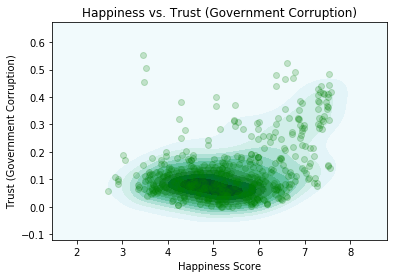

In [51]:
plot_vs_happiness('Trust (Government Corruption)')

Изглежда, че има зависимост между това, колко са щастливи хората, и данните за паричното състояние, семейство, свобода и продължителност на живота. Те всъщност може да корелират и помежду си, но нека поразгледаме още малко.

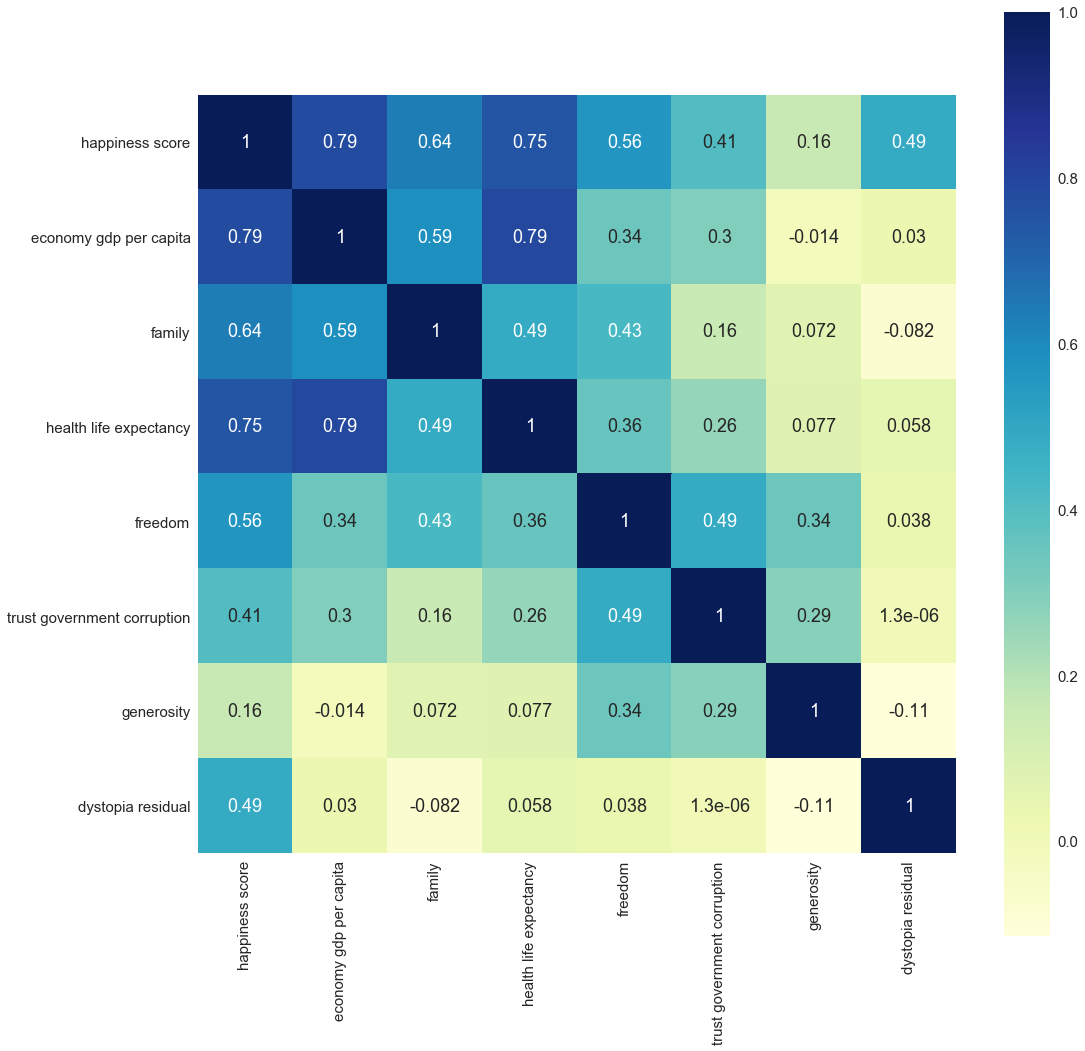

In [52]:
columns = [
    'happiness score',
    'country',
    'region',
    'economy gdp per capita',
    'family',
    'health life expectancy',
    'freedom',
    'trust government corruption',
    'generosity',
    'dystopia residual'
]
corr = data[columns].corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(17, 17))
sns.set(font_scale=1.5)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, square=True, cmap="YlGnBu", annot=True)
plt.show()

In [53]:
corr['happiness score']

happiness score                1.000000
economy gdp per capita         0.785450
family                         0.636532
health life expectancy         0.748040
freedom                        0.560353
trust government corruption    0.406340
generosity                     0.163562
dystopia residual              0.489747
Name: happiness score, dtype: float64

С корелацията между feature-ите отново показваме, че щастието на хората силно зависи от паричното им състояние, здравето им, семейството им, свободата им и по-слабо от корупцията в държавата и щедростта на хората.

Да разгледаме какво се случва с данните през годините, като ги групираме по региони.

In [54]:
data.region.unique().tolist()

['Western Europe',
 'North America',
 'Australia and New Zealand',
 'Middle East and Northern Africa',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Sub-Saharan Africa',
 'Southern Asia']

In [55]:
def barplot_by_region(feature_name):
    cleaned_feature_name = clean_column_name(feature_name)

    regions = data.region.unique().tolist()

    plt.figure(figsize=(16, 7))
    sns.set(font_scale=1.5)

    sns.barplot(x=data['region'], y=data[cleaned_feature_name], order=regions, hue=data['year'], hue_order=[2015, 2016, 2017])
    plt.xticks(rotation=80)
    plt.xlabel('Regions')
    plt.ylabel('Average ' + feature_name)
    plt.title(feature_name + ' by Region')
    plt.show()

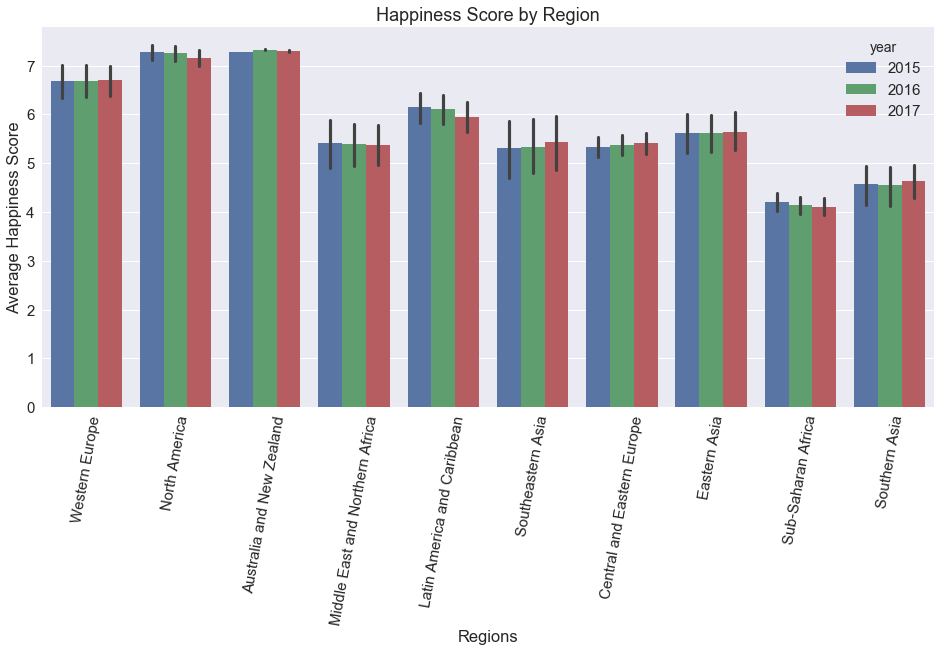

In [56]:
barplot_by_region('Happiness Score')

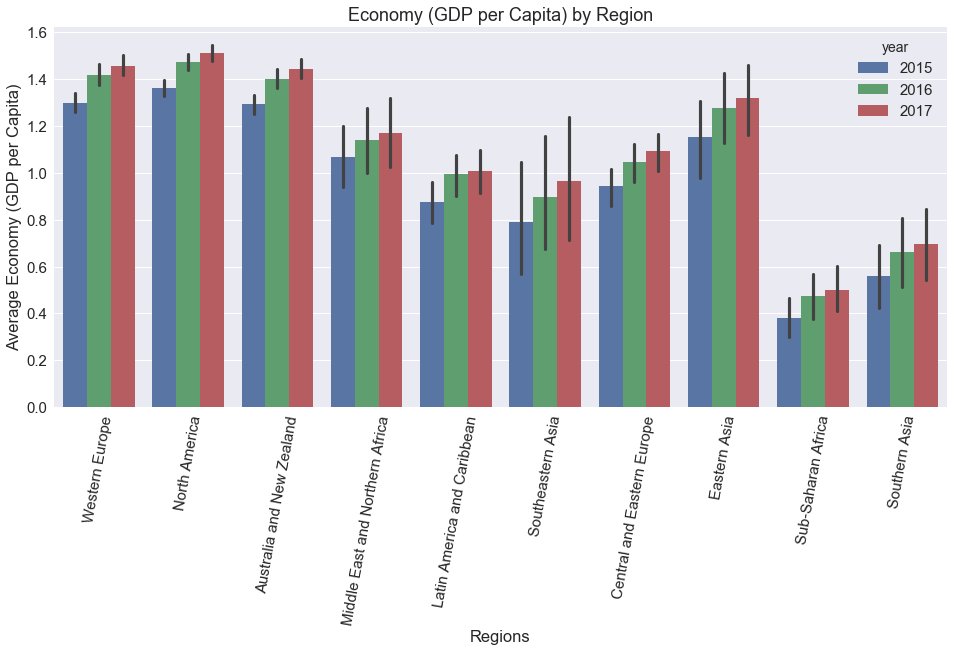

In [57]:
barplot_by_region('Economy (GDP per Capita)')

Изглежда, че БВП нараства във всички региони за периода 2015-2017.

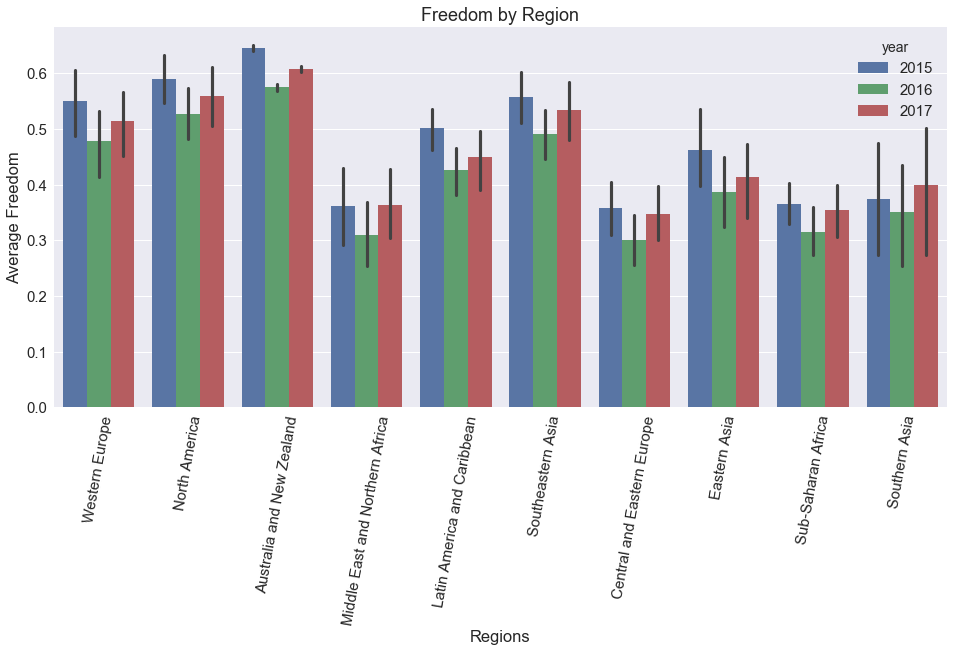

In [58]:
barplot_by_region('Freedom')

Чувството за свобода във всички региони е по-ниско през 2016 спрямо 2015 и 2017, което може и да е заради различен подход при събиране на данните. Все пак в повечето региони имаме спад за 2017 спрямо 2015, освен в Южна Азия.

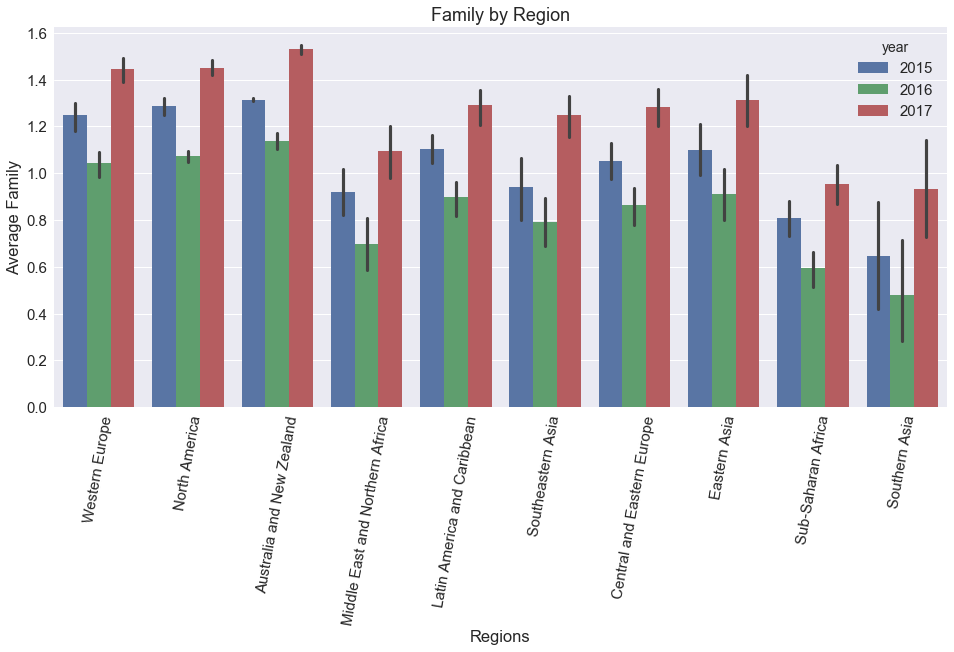

In [59]:
barplot_by_region('Family')

Данните за семейството също показват спад през 2016, но във всички региони наблюдаваме ръст през 2017 спрямо 2015.

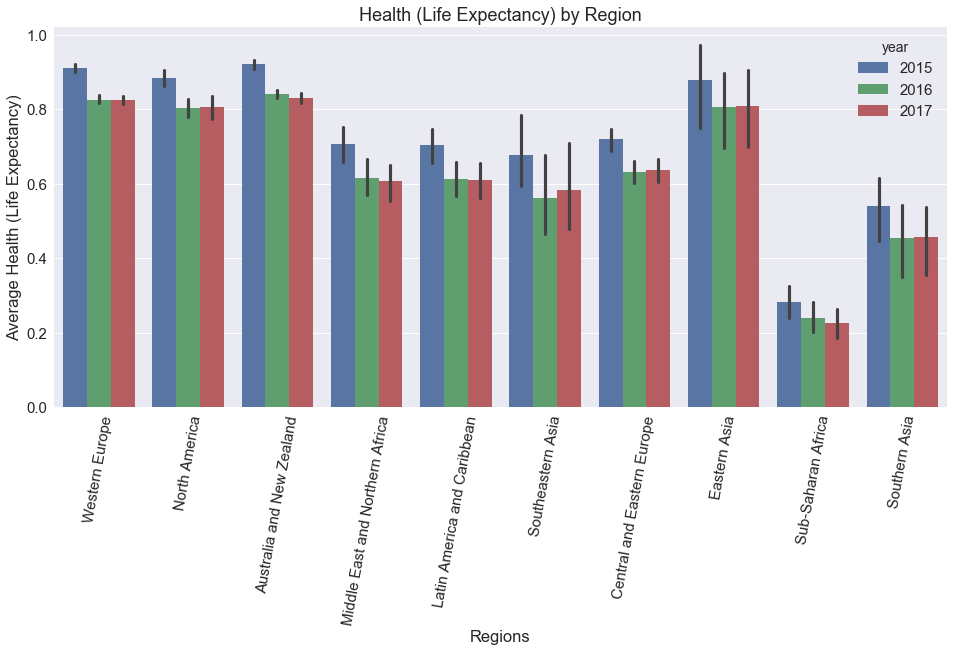

In [60]:
barplot_by_region('Health (Life Expectancy)')

Данните за здраве/продължителност на живота показват спад след 2015 година, освен в Южна Азия, където има лек ръст през 2017 спрямо 2016.

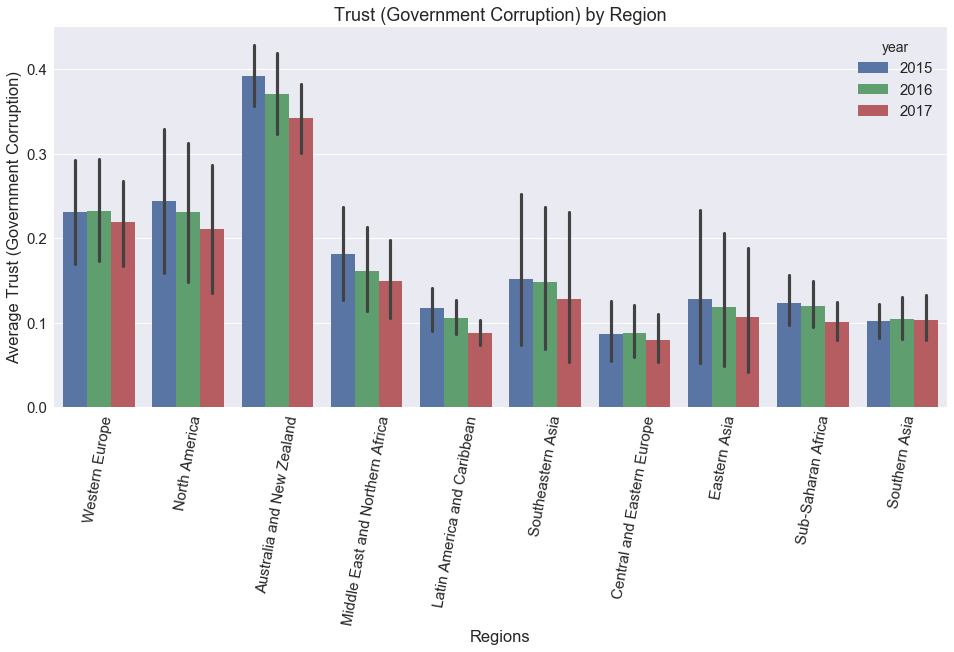

In [61]:
barplot_by_region('Trust (Government Corruption)')

Във всички региони с изключение на Южна Азия се вижда спад в доверието към управлението в съответните държави.

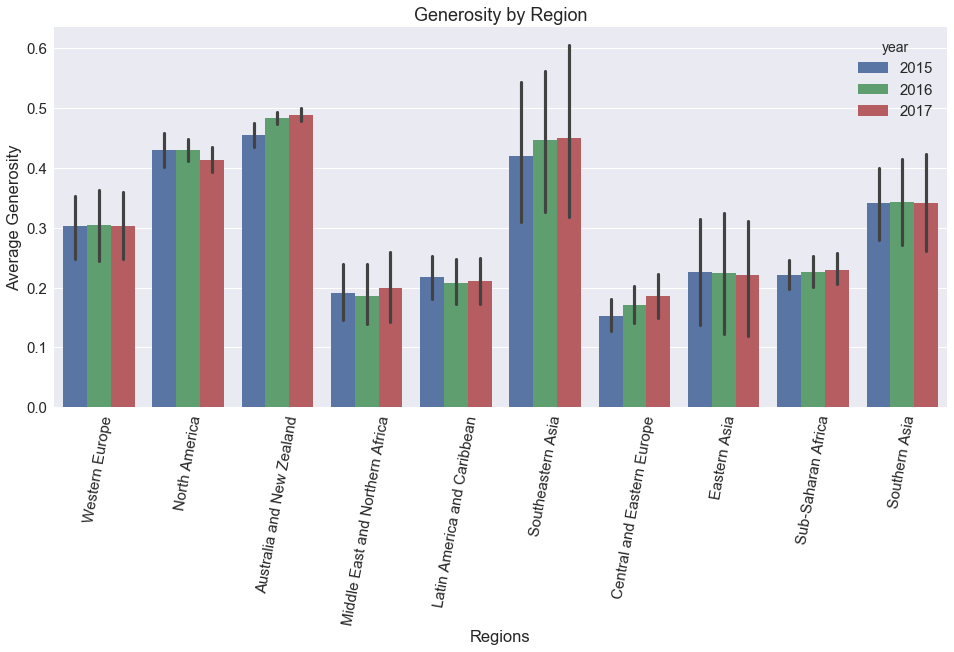

In [62]:
barplot_by_region('Generosity')

При щедростта няма ясен тренд за всички региони. Най-висока е средната щедрост в Австралия и Нова Зеландия, с отделни държави в Югоизточна Азия с по-високи числа за щедрост.

Нека разгледаме една интересна графика, която ще ни покаже по региони, къде от какво най-много зависи щедростта:

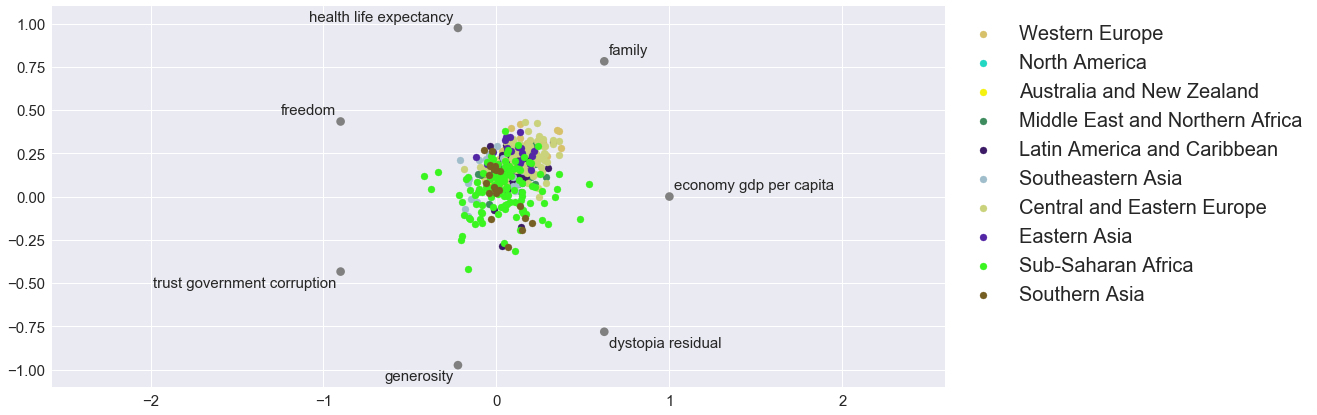

In [63]:
from pandas.plotting import radviz
pd.options.mode.chained_assignment = None

columns = [
    'region',
    'economy gdp per capita',
    'family',
    'health life expectancy',
    'freedom',
    'trust government corruption',
    'generosity',
    'dystopia residual'
]

plt.figure(figsize=(16, 7))

radviz(data[columns], 'region')
plt.legend(bbox_to_anchor=(1,1), fontsize=20)
plt.show()

От документацията на `Pandas`

> RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

Ако повдигнем данните на степен, вероятно разликите във feature-ите ще бъдат по-ясно изразени и ще приближим точките за всяка страна до feature-ът, който най-много влияе на щастието на жителите ѝ. Да пробваме:

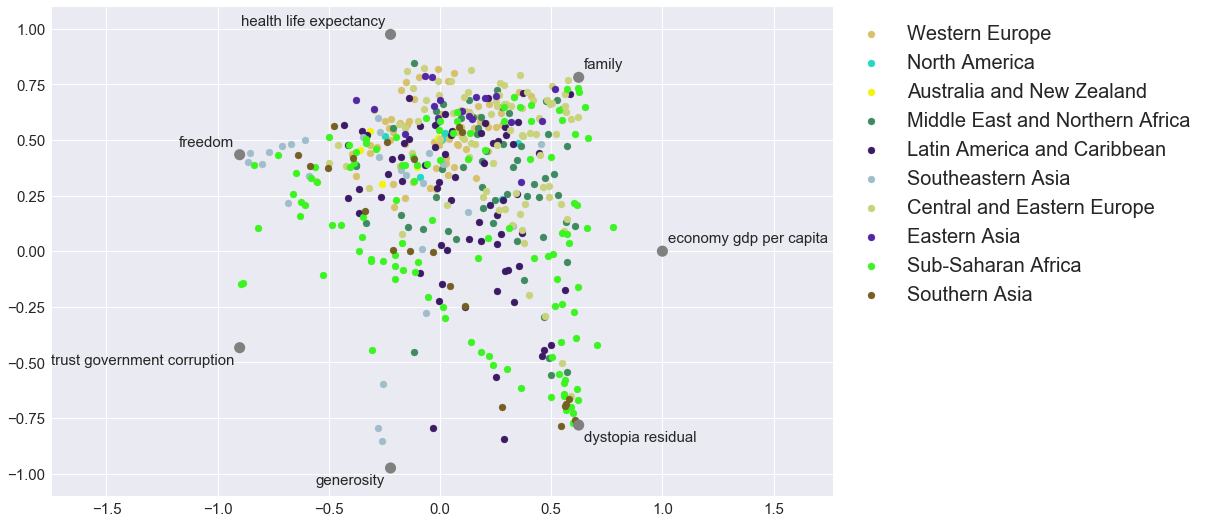

In [64]:
numeric_columns = [
    'economy gdp per capita',
    'family',
    'health life expectancy',
    'freedom',
    'trust government corruption',
    'generosity',
    'dystopia residual'
]

exp_columns = data[numeric_columns] ** 6
exp_columns['region'] = data['region']

plt.figure(figsize=(14, 9))

radviz(exp_columns, 'region')
plt.legend(bbox_to_anchor=(1,1), fontsize=20)
plt.show()

Тук може да видим, че семейството играе важна роля за държави основно от Субсахарска Африка, Австралия и Нова Зеландия и други. Усещането за свобода е ключово основно за държави в Югоизточна Азия. Щедростта изглежда като основна точка при определянето на щастието за няколко държави от Югоизточна Азия. Останалите държави са по-скоро произволно разпределени между feature-ите.

## Трениране на модел

> ### Съдържание

> [Пръв поглед](#Пръв-поглед)

> [Обработка на данните](#Обработка-на-данните)

> [Визуализация](#Визуализация)

> [**Трениране на модел**](#Трениране-на-модел)

> [Заключение](#Заключение)

Да погледнем отново данните:

In [65]:
data.head()

,country,region,happiness rank,happiness score,standard error,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,dystopia residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Нека пробваме да познаваме `happiness score` по `economy gdp per capita`, `family`, `health`, `life expectancy`, `freedom`, `trust government corruption`, `generosity`, `dystopia residual` и `year`. Тоест ще премахнем `happiness score`, `happiness rank` и `standard error` от данните в `X`. Ще премахнем и държавата, и региона и ще видим докъде ще стигнем. 

In [66]:
X = data.drop(['happiness score', 'happiness rank', 'standard error', 'country', 'region'], axis=1)
y = data['happiness score']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(352, 8) (118, 8) (352,) (118,)


In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.999999938307
test score:  0.999999931223


In [69]:
print(X.columns)
model.coef_

Index(['economy gdp per capita', 'family', 'health life expectancy', 'freedom',
       'trust government corruption', 'generosity', 'dystopia residual',
       'year'],
      dtype='object')


array([  9.99992208e-01,   9.99951408e-01,   9.99987669e-01,
         9.99939607e-01,   9.99951101e-01,   1.00005434e+00,
         9.99948427e-01,   1.83245371e-05])

Интересно?! След повторен прочит на описанието на данните в Kaggle, установяваме, че `distopia residual` feature-ът, който имаме най-вероятно не идва от проучването на населението, а по-скоро от следващ анализ и е точно с цел да обясни неясни зависимости между останалите данни и `happiness score`. Нека пробваме да тренираме без `distopia residual`.

In [70]:
X = X.drop(['dystopia residual'], axis=1)
y = data['happiness score']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(352, 7) (118, 7) (352,) (118,)


In [72]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.778075529137
test score:  0.729874370316


In [73]:
print(X.columns)
model.coef_

Index(['economy gdp per capita', 'family', 'health life expectancy', 'freedom',
       'trust government corruption', 'generosity', 'year'],
      dtype='object')


array([ 1.01914447,  0.75730872,  1.24833517,  1.26828746,  1.06800532,
        0.39575186, -0.11172031])

Ето, очаквано получихме доста по-лош резултат. Да видим дали можем да го подобрим, ако добавим регионите на страните.

In [74]:
X = data.drop(['happiness score', 'happiness rank', 'standard error', 'country', 'dystopia residual'], axis=1)
y = data['happiness score']
X.head()

,region,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,year
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Нека one-hot-encode-нем регионите.

In [75]:
X = pd.get_dummies(X, columns = ['region'])
print(X.shape)
X.head()

(470, 17)


,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,year,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0,0,0,0,0,0,0,0,1
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0,0,0,0,0,0,0,0,0,1
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0,0,0,0,0,0,0,0,0,1
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0,0,0,0,0,0,0,0,0,1
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0,0,0,0,0,1,0,0,0,0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(352, 17) (118, 17) (352,) (118,)


In [77]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.822596319071
test score:  0.793782385438


In [78]:
print(X.columns)
model.coef_

Index(['economy gdp per capita', 'family', 'health life expectancy', 'freedom',
       'trust government corruption', 'generosity', 'year',
       'region_Australia and New Zealand', 'region_Central and Eastern Europe',
       'region_Eastern Asia', 'region_Latin America and Caribbean',
       'region_Middle East and Northern Africa', 'region_North America',
       'region_Southeastern Asia', 'region_Southern Asia',
       'region_Sub-Saharan Africa', 'region_Western Europe'],
      dtype='object')


array([ 1.04673751,  0.60213604,  0.64363656,  0.91205804,  1.23936679,
        0.60274297, -0.11719987,  0.39355268, -0.07638004, -0.37188035,
        0.50289491, -0.20143635,  0.53374436, -0.21000033, -0.35546209,
       -0.36403422,  0.14900143])

Подобрихме резултата. Не мисля, че може да постигнем много с регуляризация. Нека пробваме направо друг регресор, например RandomForest.

In [79]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.966956235828
test score:  0.811319113902


Подобрихме `test score`-а. Да видим докъде ще стигнем с `GridSearch`.

In [80]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [1, 10, 100, 200, 300],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_split': [2, 4, 8, 12, 16, 20, 30]
}

# timing
import time
start_time = time.time()
#

rf_search = GridSearchCV(RandomForestRegressor(random_state=0, n_jobs=8), param_grid=grid, cv=5)
rf_search.fit(X_train, y_train)
print(rf_search.best_params_)

# timing
print("--- %s seconds ---" % (time.time() - start_time))
#


RandomForest_best = rf_search.best_estimator_
print(RandomForest_best)

model = RandomForest_best.fit(X_train, y_train)
print("train score with best parameters:", model.score(X_train, y_train))
print("test score with best parameters: ", model.score(X_test, y_test))

{'min_samples_split': 2, 'n_estimators': 300, 'max_features': 0.2}
--- 310.4316375255585 seconds ---
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=8,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
train score with best parameters: 0.977623052152
test score with best parameters:  0.827896345573


Интересно, че не можем да се справим добре с overfit-a само с промяна на параметрите тук. В нашия сплит стигнахме до тестов резултат 0.827896345573.

Да пробваме и SVR.

In [81]:
X.head(1)

,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,year,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0,0,0,0,0,0,0,0,1


Само годината ни не изглежда добре скалирана - нека да извадим 2015 от нея.

In [82]:
X['year'] -= 2015

In [83]:
X.describe()

,economy gdp per capita,family,health life expectancy,freedom,trust government corruption,generosity,year,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,0.993617,0.012766,0.185106,0.038298,0.144681,0.123404,0.012766,0.055319,0.044681,0.248936,0.134043
std,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.816907,0.112383,0.388798,0.192119,0.352154,0.329251,0.112383,0.228846,0.206822,0.432857,0.341061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Изглежда добре.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(352, 17) (118, 17) (352,) (118,)


In [85]:
from sklearn.svm import SVR

model = SVR().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.82949459738
test score:  0.813107622959


Не получихме по-добър резултат и не изглежда, че може да се подобри с промяна на хиперпараметри.

## Заключение

> ### Съдържание

> [Пръв поглед](#Пръв-поглед)

> [Обработка на данните](#Обработка-на-данните)

> [Визуализация](#Визуализация)

> [Трениране на модел](#Трениране-на-модел)

> [**Заключение**](#Заключение)

Най-добър резултат получихме като използвахме всички данни, но вероятно те самите бяха нагласени така, че да лежат точно в една хиперравнина и заради това линейната регресия ни даде толкова добри резултати.

Без данните в `dystopia residual` най-добър резултат за нашия сплит ни даде `Random Forest`(test score: ~0.827), като изглеждаше, че дори с промяна на хиперпараматрите получаваме силен overfit, който към момента не успяваме да диагностицираме.